<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20220908.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* customer analysis
* iterations

In [2]:
import pandas as pd
import numpy as np
import plotnine as gg
from plotnine import ggplot, aes 

from datetime import datetime, date, time, timezone, timedelta 
import os 
import re

from functools import reduce 
from collections import defaultdict, ChainMap, Counter
from itertools import product

# customer analysis

In [3]:
os.listdir()

['.config',
 'ecommerce-data.csv',
 'KPMG_VI_New_raw_data_update_final.csv',
 'online_retail_II.xlsx',
 'test.csv',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'sample_data']

In [4]:
df = pd.read_csv('ecommerce-data.csv', encoding = 'unicode_escape')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [36]:
df.columns = ['_'.join(re.split(r'(?=[A-Z][a-z])', a[0].lower() + a[1:])).lower() for a in df.columns]
df.head()


,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customerid,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [37]:
df = df[(~df.invoice_no.astype(str).str.contains('C')) & (df.country == 'United Kingdom')]

In [38]:
df.description.value_counts()

WHITE HANGING HEART T-LIGHT HOLDER     2231
JUMBO BAG RED RETROSPOT                1960
REGENCY CAKESTAND 3 TIER               1711
PARTY BUNTING                          1615
LUNCH BAG RED RETROSPOT                1421
                                       ... 
thrown away-can't sell                    1
rcvd be air temp fix for dotcom sit       1
PACK 4 FLOWER/BUTTERFLY PATCHES           1
MUMMY MOUSE RED GINGHAM RIBBON            1
PAPER CRAFT , LITTLE BIRDIE               1
Name: description, Length: 4188, dtype: int64

In [56]:
df.invoice_date = pd.to_datetime(df.invoice_date)
df['date'] = df.invoice_date.to_numpy().astype('datetime64[D]')
df['month'] = df.invoice_date.to_numpy().astype('datetime64[M]')
df['rev'] = df.quantity * df.unit_price 
df.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customerid,country,date,month,rev
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,20.34


In [58]:
df = df.rename(columns = {'customerid':'id'}).groupby(['id','month','date'])['rev'].sum().reset_index()
df.head()

,id,month,date,rev
0,12346.0,2011-01-01,2011-01-18,77183.60
1,12747.0,2010-12-01,2010-12-05,358.56
2,12747.0,2010-12-01,2010-12-13,347.71
3,12747.0,2011-01-01,2011-01-20,303.04
4,12747.0,2011-03-01,2011-03-01,310.78


In [61]:
list_npu = df.groupby(['id']).min().reset_index().rename(columns = {'date':'npu_date'})
df_ = pd.merge(df, list_npu, 'left', 'id')
df_ = df_.assign(week = (df_['date'] - df_['date'].dt.weekday.astype('timedelta64[D]')).astype(str),
                 days = (df_['date'] - df_['npu_date']).dt.days
                 )
cnt = df_.groupby(['week', 'days'])['id'].count().reset_index().rename(columns = {'id':'pu'})
cnt['ratio'] = cnt.groupby(['week'])['pu'].apply(lambda x: round(x/x.max()*100,2))
cnt = pd.melt(cnt, id_vars = ['week','days'], var_name = 'type')
cnt.head()

,week,days,type,value
0,2010-11-29,0,pu,278.0
1,2010-11-29,1,pu,5.0
2,2010-11-29,2,pu,4.0
3,2010-11-29,4,pu,5.0
4,2010-12-06,0,pu,320.0


/usr/local/lib/python3.7/dist-packages/plotnine/facets/facet.py:393: PlotnineWarning: If you need more space for the x-axis tick text use ... + theme(subplots_adjust={'wspace': 0.25}). Choose an appropriate value for 'wspace'.


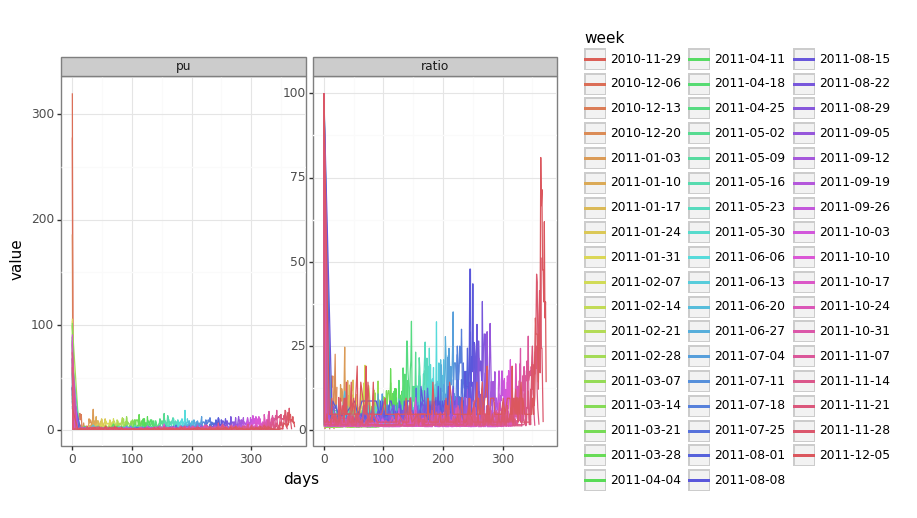

<ggplot: (8785431736625)>

In [63]:
(
    ggplot(cnt, aes('days','value', color = 'week')) +
    gg.geom_line() +
    gg.facet_wrap('~type', scales = 'free_y') +
    gg.theme_bw()
)

# iterations

In [64]:
mat = [list('ABC'), list('DEF'), list('GHI')]
[(r, c, letters) for r, rows in enumerate(mat) for c, letters in enumerate(rows)]

[(0, 0, 'A'),
 (0, 1, 'B'),
 (0, 2, 'C'),
 (1, 0, 'D'),
 (1, 1, 'E'),
 (1, 2, 'F'),
 (2, 0, 'G'),
 (2, 1, 'H'),
 (2, 2, 'I')]

In [65]:
users = [{'mail': 'gregorythomas@gmail.com', 'name': 'Brett Holland', 'sex': 'M', 'age': 73},
 {'mail': 'hintoncynthia@hotmail.com', 'name': 'Madison Martinez', 'sex': 'F', 'age': 29},
 {'mail': 'wwagner@gmail.com', 'name': 'Michael Jenkins', 'sex': 'M', 'age': 51},
 {'mail': 'daniel79@gmail.com', 'name': 'Karen Rodriguez', 'sex': 'F', 'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]
users

[{'mail': 'gregorythomas@gmail.com',
  'name': 'Brett Holland',
  'sex': 'M',
  'age': 73},
 {'mail': 'hintoncynthia@hotmail.com',
  'name': 'Madison Martinez',
  'sex': 'F',
  'age': 29},
 {'mail': 'wwagner@gmail.com',
  'name': 'Michael Jenkins',
  'sex': 'M',
  'age': 51},
 {'mail': 'daniel79@gmail.com',
  'name': 'Karen Rodriguez',
  'sex': 'F',
  'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]

In [69]:
{key : eval(f'reduce(lambda acc, cur : acc + [cur["{key}"]], users, [])')  for key in list(users[0].keys())}

{'mail': ['gregorythomas@gmail.com',
  'hintoncynthia@hotmail.com',
  'wwagner@gmail.com',
  'daniel79@gmail.com',
  'ujackson@gmail.com'],
 'name': ['Brett Holland',
  'Madison Martinez',
  'Michael Jenkins',
  'Karen Rodriguez',
  'Amber Rhodes'],
 'sex': ['M', 'F', 'M', 'F', 'F'],
 'age': [73, 29, 51, 32, 42]}

In [72]:
def add_arthor_with_name(name) :
  def add_arthor(func) :
    def wrapper(*args, **kwargs) :
      return name + '\n' + func(*args, **kwargs) 
    return wrapper 
  return add_arthor

def add_arthor(func) :
  def wrapper(*args, **kwargs) :
    return 'park' + '\n' + func(*args, **kwargs)
  return wrapper

@add_arthor_with_name('kim')
def get_title(title) :
  return title

@add_arthor 
def get_title2(t1, t2) :
  return t1 + ' ' + t2

In [73]:
print(get_title('할 말이 있어'))
print(get_title2('내가 힘겹게 건내 놓은', '내 마지막 얘기'))

kim
할 말이 있어
park
내가 힘겹게 건내 놓은 내 마지막 얘기
